In [1]:
#Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn import cluster as cl
from sklearn  import preprocessing  as pr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn import ensemble as ens



In [17]:
# Загрузка данных, удаление лишних данных по всем 3 выборкам
column=['0takt','1takt','2takt','3takt','4takt','5takt','6takt','7takt','8takt',
                          '9takt','10takt','11takt','12takt','13takt','14takt','15takt','16takt','17takt']

nn=[3,16,22,24,28]
npp=16
try:
    df1=pd.read_csv('SOP1.dat',delimiter=' ',encoding='windows-1250',header=1,usecols=range(1,17))
    #df1=pd.read_csv('Results/К'+str(npp)+'.dat',delimiter=' ',encoding='windows-1250',header=1,usecols=range(1,17))
    df1.columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
    df2=pd.read_csv('SOP2.dat',delimiter=' ',encoding='windows-1250',header=1,usecols=range(1,17))
    #df1=pd.read_csv('Results/К'+str(npp)+'.dat',delimiter=' ',encoding='windows-1250',header=1,usecols=range(1,17))
    df2.columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
    df3=pd.read_csv('SOP3.dat',delimiter=' ',encoding='windows-1250',header=1,usecols=range(1,17))
    #df1=pd.read_csv('Results/К'+str(npp)+'.dat',delimiter=' ',encoding='windows-1250',header=1,usecols=range(1,17))
    df3.columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

    print('Данные загруженны ')
except:
    print('Данные не загрузились ')

try:  
    #df1=df1.drop([0,0]) # удаление технической строки
    #df1=df1.drop(columns=[17,0]) # удаление лишних столбцов,   расстояние мм будет индекс

    #df1=df1.astype("float32")# приводим данные к float

    print('Данные  обработаны ')
except:
    print('Данные не обработались ')

    
#Здесь указываем требуемый датафрейм
df11=df1.copy()

#Приведение к общей координате
for n in df11.columns:
    df11[n]=np.roll(df11[n],-50)
    
for p in ['3','4','5','6','9','10']:
    df11[n]=np.roll(df11[n],95)
    
for n in df11.columns:
    df11[n]=np.roll(df11[n],-95)
    
    
#Здесь указываем требуемый датафрейм
df21=df2.copy()

#Приведение к общей координате
for n in df11.columns:
    df21[n]=np.roll(df21[n],-50)
    
for p in ['3','4','5','6','9','10']:
    df21[n]=np.roll(df21[n],95)
    
for n in df11.columns:
    df21[n]=np.roll(df21[n],-95)
    

    
#Здесь указываем требуемый датафрейм
df31=df3.copy()

#Приведение к общей координате
for n in df11.columns:
    df31[n]=np.roll(df31[n],-50)
    
for p in ['3','4','5','6','9','10']:
    df31[n]=np.roll(df31[n],95)
    
for n in df11.columns:
    df31[n]=np.roll(df31[n],-95)
    
    
#Загрузка файла с целевой переменной
#Здесь указываем требуемый таргет
#targ=pd.read_table('Target/k'+str(npp)+'.csv',sep=',')
targ1=pd.read_table('target1.csv',sep=',')
targ1
targ1.fillna(0)


targ2=pd.read_table('target2.csv',sep=',')
targ2
targ2.fillna(0)

targ3=pd.read_table('target3.csv',sep=',')
targ3
targ3.fillna(0)

#Сделаем в датафрейме общем разбитие на классы в соответствии с имеющимся таргетом
df11['deffect']=0
df11['visota']=0
for n in range(len(targ1)):
    if targ1['Сторона'][n]=='A':
        df11.deffect[targ1['Начало дефекта'][n]-1:(targ1['Начало дефекта'][n]-1+int(targ1['Длина дефекта'][n]))]=1
        df11.visota[targ1['Начало дефекта'][n]-1:(targ1['Начало дефекта'][n]-1+int(targ1['Длина дефекта'][n]))]=targ1['Высота дефекта'][n]
    if targ1['Сторона'][n]=='B':
        df11.visota[targ1['Начало дефекта'][n]-1:(targ1['Начало дефекта'][n]-1+int(targ1['Длина дефекта'][n]))]=targ1['Высота дефекта'][n]
        df11.deffect[targ1['Начало дефекта'][n]-1:(targ1['Начало дефекта'][n]-1+int(targ1['Длина дефекта'][n]))]=2  
    if targ1['Тип дефекта'][n]=='T':
        df11.visota[targ1['Начало дефекта'][n]-1:(targ1['Начало дефекта'][n])]=targ1['Высота дефекта'][n]
        df11.deffect[targ1['Начало дефекта'][n]-1:(targ1['Начало дефекта'][n])]=3    
        
        
#Сделаем в датафрейме общем разбитие на классы в соответствии с имеющимся таргетом
df21['deffect']=0
df21['visota']=0
for n in range(len(targ2)):
    if targ2['Сторона'][n]=='A':
        df21.deffect[targ2['Начало дефекта'][n]-1:(targ2['Начало дефекта'][n]-1+int(targ2['Длина дефекта'][n]))]=1
        df21.visota[targ2['Начало дефекта'][n]-1:(targ2['Начало дефекта'][n]-1+int(targ2['Длина дефекта'][n]))]=targ2['Высота дефекта'][n]
    if targ2['Сторона'][n]=='B':
        df21.visota[targ2['Начало дефекта'][n]-1:(targ2['Начало дефекта'][n]-1+int(targ2['Длина дефекта'][n]))]=targ2['Высота дефекта'][n]
        df21.deffect[targ2['Начало дефекта'][n]-1:(targ2['Начало дефекта'][n]-1+int(targ2['Длина дефекта'][n]))]=2  
    if targ2['Тип дефекта'][n]=='T':
        df21.visota[targ2['Начало дефекта'][n]-1:(targ2['Начало дефекта'][n])]=targ2['Высота дефекта'][n]
        df21.deffect[targ2['Начало дефекта'][n]-1:(targ2['Начало дефекта'][n])]=3   
        
        
#Сделаем в датафрейме общем разбитие на классы в соответствии с имеющимся таргетом
df31['deffect']=0
df31['visota']=0
for n in range(len(targ3)):
    if targ3['Сторона'][n]=='A':
        df31.deffect[targ3['Начало дефекта'][n]-1:(targ3['Начало дефекта'][n]-1+int(targ3['Длина дефекта'][n]))]=1
        df31.visota[targ3['Начало дефекта'][n]-1:(targ3['Начало дефекта'][n]-1+int(targ3['Длина дефекта'][n]))]=targ3['Высота дефекта'][n]
    if targ3['Сторона'][n]=='B':
        df31.visota[targ3['Начало дефекта'][n]-1:(targ3['Начало дефекта'][n]-1+int(targ3['Длина дефекта'][n]))]=targ3['Высота дефекта'][n]
        df31.deffect[targ3['Начало дефекта'][n]-1:(targ3['Начало дефекта'][n]-1+int(targ3['Длина дефекта'][n]))]=2  
    if targ3['Тип дефекта'][n]=='T':
        df31.visota[targ3['Начало дефекта'][n]-1:(targ3['Начало дефекта'][n])]=targ3['Высота дефекта'][n]
        df31.deffect[targ3['Начало дефекта'][n]-1:(targ3['Начало дефекта'][n])]=3   

Данные загруженны 
Данные  обработаны 


In [21]:
df=pd.concat([df11,df21,df31],ignore_index=True)

In [22]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,deffect,visota
0,0,0,0,0,44,85,0,0,34,50,0,0,18,74,0,20,0,0
1,0,0,0,0,79,62,0,0,21,52,0,0,23,85,9,12,0,0
2,0,0,23,0,76,74,0,0,26,77,0,0,32,96,12,13,0,0
3,0,0,0,0,86,118,0,0,39,39,0,0,47,120,10,2,0,0
4,0,0,0,0,88,148,0,0,43,33,0,0,60,127,10,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,0,0,0,0,89,93,0,0,1,9,0,4,97,173,14,7,0,0
3112,0,0,0,0,66,81,0,0,2,10,0,0,97,173,10,4,0,0
3113,0,0,0,0,39,91,0,0,5,27,0,0,95,174,0,14,0,0
3114,0,0,0,0,37,125,0,0,8,8,0,0,93,157,0,20,0,0


<IPython.core.display.Javascript object>


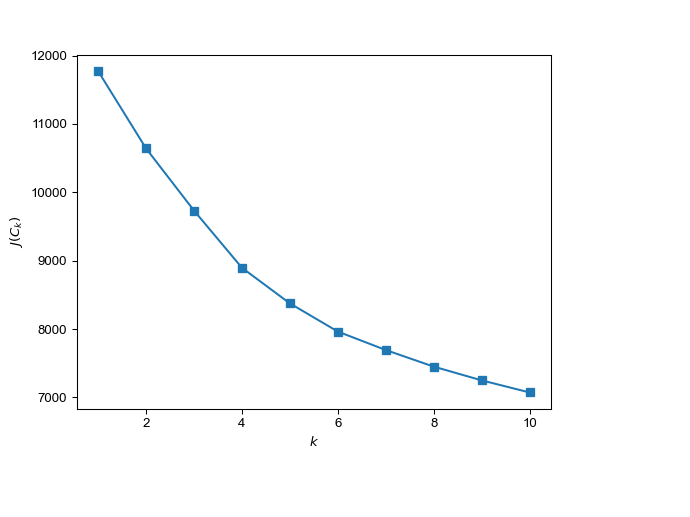

In [23]:
from sklearn.cluster import KMeans
#Подбор количества кластеров
SC=pr.StandardScaler()
dfX=df.drop(['deffect','visota'],axis=1)
y=df.deffect
X=dfX#SC.fit_transform(df11X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

# Обучение модели


In [25]:


#Сделаем препроцессинг данных (подготовку)
SC=pr.StandardScaler()

X=SC.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape


# Используем несколько алгоритмов кластеризации
KM=cl.KMeans(n_clusters=4,  init='k-means++', n_init=10, max_iter=300, 
          tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
DB=cl.DBSCAN(eps=50,  min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', 
       leaf_size=30, p=None, n_jobs=None)
AP=cl.AffinityPropagation( damping=0.5, max_iter=200, convergence_iter=15, copy=True,
                    preference=None, affinity='euclidean', verbose=False, random_state=None)

AC=cl.AgglomerativeClustering(n_clusters=4,  affinity='euclidean', memory=None, connectivity=None, 
                        compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

OP=cl.OPTICS( min_samples=15, max_eps=50, metric='minkowski', p=2, metric_params=None, cluster_method='xi', 
       eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', 
       leaf_size=30, memory=None, n_jobs=None)

SpC=cl.SpectralClustering(n_clusters=8, random_state=1,
                                     affinity='nearest_neighbors')
#Создадим отдельный датафрейм с результатами

df111=df.copy()
df111['KmeansSC']=KM.fit_predict(X)
#df111['DBSCANSC']=DB.fit_predict(X)
#df111['APSC']=DB.fit_predict(X)
df111['ACSC']=AC.fit_predict(X)
df111['OPSC']=OP.fit_predict(X)
df111['SpCSC']=SpC.fit_predict(X)

df111['Kmeans']=KM.fit_predict(df)
df111['DBSCAN']=DB.fit_predict(df)
df111['AP']=AP.fit_predict(df)
df111['AC']=AC.fit_predict(df)
df111['OP']=OP.fit_predict(df)
df111['SpC']=SpC.fit_predict(df)




In [26]:
for o in df111.columns:
    print(o,metrics.adjusted_rand_score(df111[o],y))

1 0.07232347316347044
2 0.31966177999617257
3 0.14718294638482673
4 0.08672169439471093
5 -0.003460228634829559
6 -0.007585355148070556
7 -0.011901393291526365
8 -0.029147438693590707
9 0.0063931177359894216
10 -0.0032634148434856286
11 0.2317346847572006
12 0.037447307458566066
13 -0.030076993078295075
14 -0.047703574648244575
15 -0.03455682292761639
16 0.0054253430686085026
deffect 1.0
visota 0.9409661491134143
KmeansSC 0.3378610421122898
ACSC 0.3325867950381853
OPSC 0.18160887819701216
SpCSC 0.3779832693588895
Kmeans 0.062411094934737094
DBSCAN 0.028076320287739355
AP 0.0077099586237452606
AC 0.007453947406007437
OP 0.021030968453649046
SpC 0.1352484491632508


In [ ]:

sns.heatmap(round(df111[[ 'deffect', 'visota', 'KmeansSC', 'ACSC', 'OPSC',
       'SpCSC', 'Kmeans', 'DBSCAN', 'AP', 'AC', 'OP', 'SpC']].corr(),2),annot=True)


In [ ]:
df111.columns

In [ ]:

#clf = svm.SVC(kernel='linear', C=1)

scores = cross_val_score(KM, X, y, cv=110)

scores

In [ ]:
    sns.heatmap(round(df111.corr(),1),annot=True)

In [27]:
# Оценка кластеризации по таргету с помощью метрик, подбор параметров



algorithms = []
algorithms.append(cl.KMeans(n_clusters=4, random_state=1))
algorithms.append(cl.AffinityPropagation())
algorithms.append(cl.SpectralClustering(n_clusters=4, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(cl.AgglomerativeClustering(n_clusters=4))




data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.351148,0.227877,0.242632,0.217196,0.229211,0.281047
Affinity,0.008178,0.161539,0.671073,0.103634,0.179541,0.158970
Spectral,0.435991,0.334379,0.282180,0.414291,0.335706,0.324254
Agglomerative,0.332587,0.243776,0.259652,0.232058,0.245081,0.250678


<IPython.core.display.Javascript object>


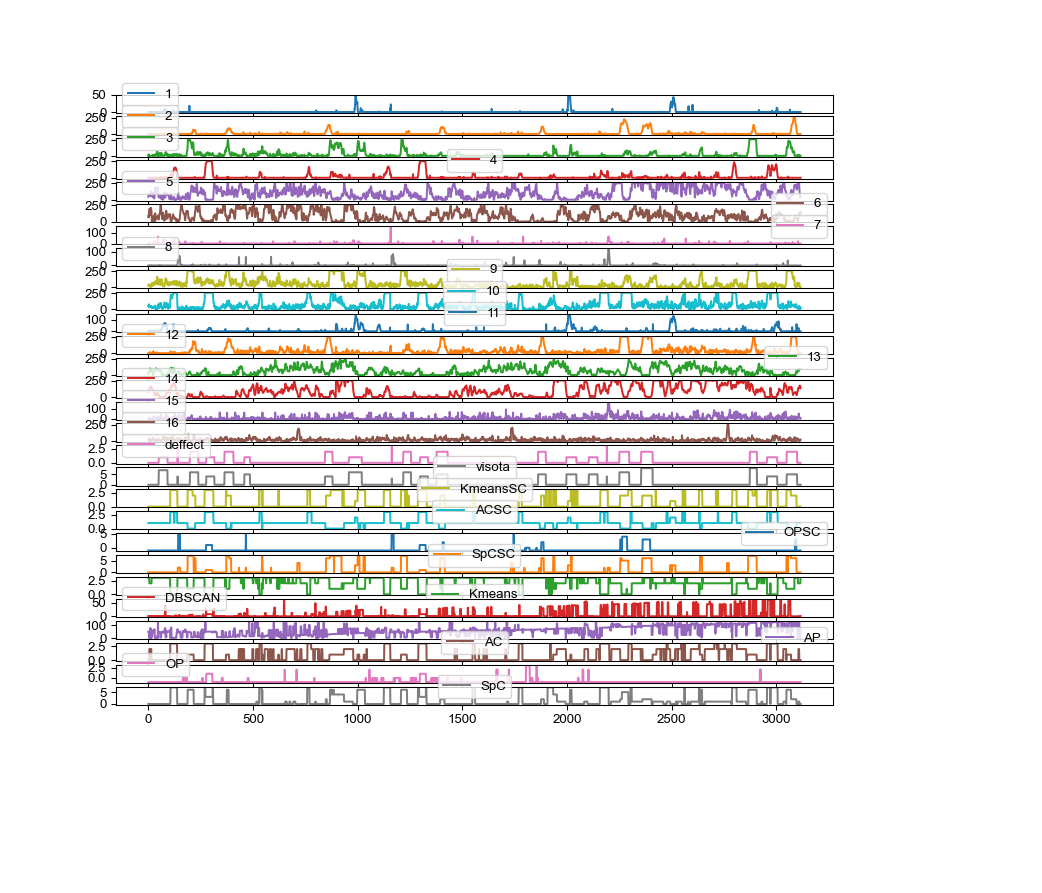

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [28]:
df111.plot.line(subplots=True)

# Добавим классификатор на имеющийся DF

In [29]:
df111.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', 'deffect', 'visota', 'KmeansSC', 'ACSC', 'OPSC',
       'SpCSC', 'Kmeans', 'DBSCAN', 'AP', 'AC', 'OP', 'SpC'],
      dtype='object')

In [30]:
X=df111[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16',  'KmeansSC', 'ACSC', 'OPSC',
       'SpCSC', 'Kmeans', 'DBSCAN', 'AP', 'AC', 'OP', 'SpC']]
y=df111.deffect

MiMa=pr.Normalizer()#pr.MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

X=MiMa.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50) 

X_train.shape, y_train.shape
X_test.shape, y_test.shape

((935, 26), (935,))

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))


Основные метрики качества на test:
Accuracy: 0.94
Precision: 0.65
Recall: 0.71
F1: 0.68

Матрица ошибок:
[[693  23  16   0]
 [  7  75   1   0]
 [  2   1 115   0]
 [  2   0   0   0]]


C:\Users\ProfiTrend\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


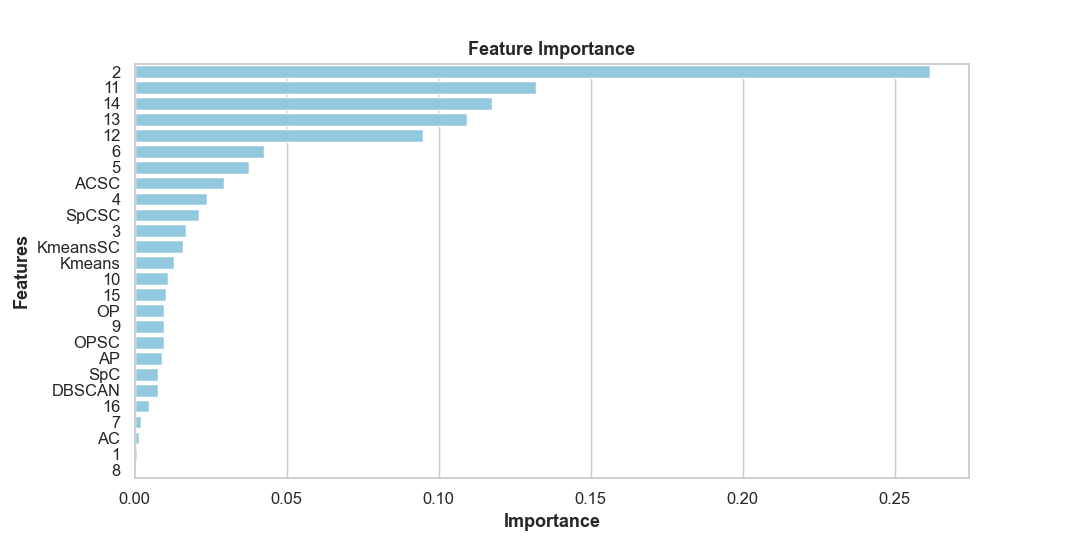

None

,Features,Gini-Importance
0,2,0.261450
1,11,0.132066
2,14,0.117632
3,13,0.109442
4,12,0.094822
5,6,0.042522
6,5,0.037701
7,ACSC,0.029368
8,4,0.023705
9,SpCSC,0.021153


In [32]:
#Отображение важности признаков
feats = {}
for feature, importance in zip(df111[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', 'KmeansSC', 'ACSC', 'OPSC',
       'SpCSC', 'Kmeans', 'DBSCAN', 'AP', 'AC', 'OP', 'SpC']], clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.0)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=12, weight = 'bold')
plt.ylabel('Features', fontsize=12, weight = 'bold')
plt.title('Feature Importance', fontsize=12, weight = 'bold')
display(plt.show())
display(importances)

In [33]:
y_pred = clf.predict(X)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
cc=pd.DataFrame(y_pred )

In [36]:
cc.value_counts()

0    2386
2     415
1     310
3       5
dtype: int64

In [37]:
cc.to_csv('rezult.csv')

In [ ]:
cc.plot.line(subplots=True)

In [ ]:
df11.deffect.plot.line()

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=50, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.95
Precision: 0.87
Recall: 0.95
F1: 0.91

Матрица ошибок:
[[697  22  19]
 [  4  77   1]
 [  3   0 112]]


In [40]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.95
Precision: 0.87
Recall: 0.95
F1: 0.91

Матрица ошибок:
[[697  22  19]
 [  4  77   1]
 [  3   0 112]]


In [41]:
from sklearn import linear_model as lm

In [42]:
LR=lm.LinearRegression()

In [68]:
xx=df


SC=pr.StandardScaler()

y=df.visota

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50) 

X_train.shape, y_train.shape
X_test.shape, y_test.shape

LR.fit(xx[:2000],y[:2000])

LinearRegression()

In [69]:
LR.score(xx, y)

1.0

In [75]:
LR.predict(xx[df.deffect==3])

array([4., 3., 4.])

In [53]:
df[df.deffect!=0]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,deffect,visota
50,0,0,9,0,36,32,0,0,63,16,0,0,71,13,9,31,1,7
51,0,0,8,0,59,69,0,0,63,26,0,0,70,0,0,22,1,7
52,0,0,19,0,72,106,0,0,77,48,0,0,72,0,0,20,1,7
53,0,0,24,0,74,115,0,0,88,39,0,0,69,0,0,9,1,7
54,0,0,45,2,69,124,0,0,125,92,0,0,66,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,0,103,0,0,207,76,0,0,14,82,0,243,54,46,16,0,2,5
3095,0,75,0,0,207,72,0,0,11,70,0,193,58,38,3,0,2,5
3096,0,51,0,0,179,71,0,0,10,47,63,152,56,30,0,10,2,5
3097,0,29,0,0,153,73,0,0,9,36,0,111,43,35,4,26,2,5
